<a href="https://colab.research.google.com/github/acekanth/hello-world/blob/master/AutoTS_Billing_20210412.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install auto_ts

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd
import numpy as np

In [ ]:
import auto_ts as AT

Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
def parse(x):
  return datetime.striptime(x, '%Y-%m')

In [ ]:
billing_data = read_csv('/gdrive/My Drive/AIML/Budget_Billing-Pattern.csv',parse_dates={'time':['Year','Month']},)

In [ ]:
billing_data.head()

,time,BilledAmount
0,2015-01-01,1495573889
1,2015-02-01,2677319369
2,2015-03-01,3017270141
3,2015-04-01,3371122481
4,2015-05-01,3171867579


In [ ]:
ts_column = 'time'
target = 'BilledAmount'

In [ ]:
ml_dict = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -7.0719477050443444      |
|           p-value           |    4.911350778459484e-10     |
|          #Lags Used         |             1.0              |
| Number of Observations Used |             70.0             |
|     Critical Value (1%)     |     -3.5274258688046647      |
|     Critical Value (5%)     |      -2.903810816326531      |
|     Critical Value (10%)    |     -2.5893204081632653      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = BilledAmount
Start of loading of data.....
Input is data frame. Performing Time Series Analysis

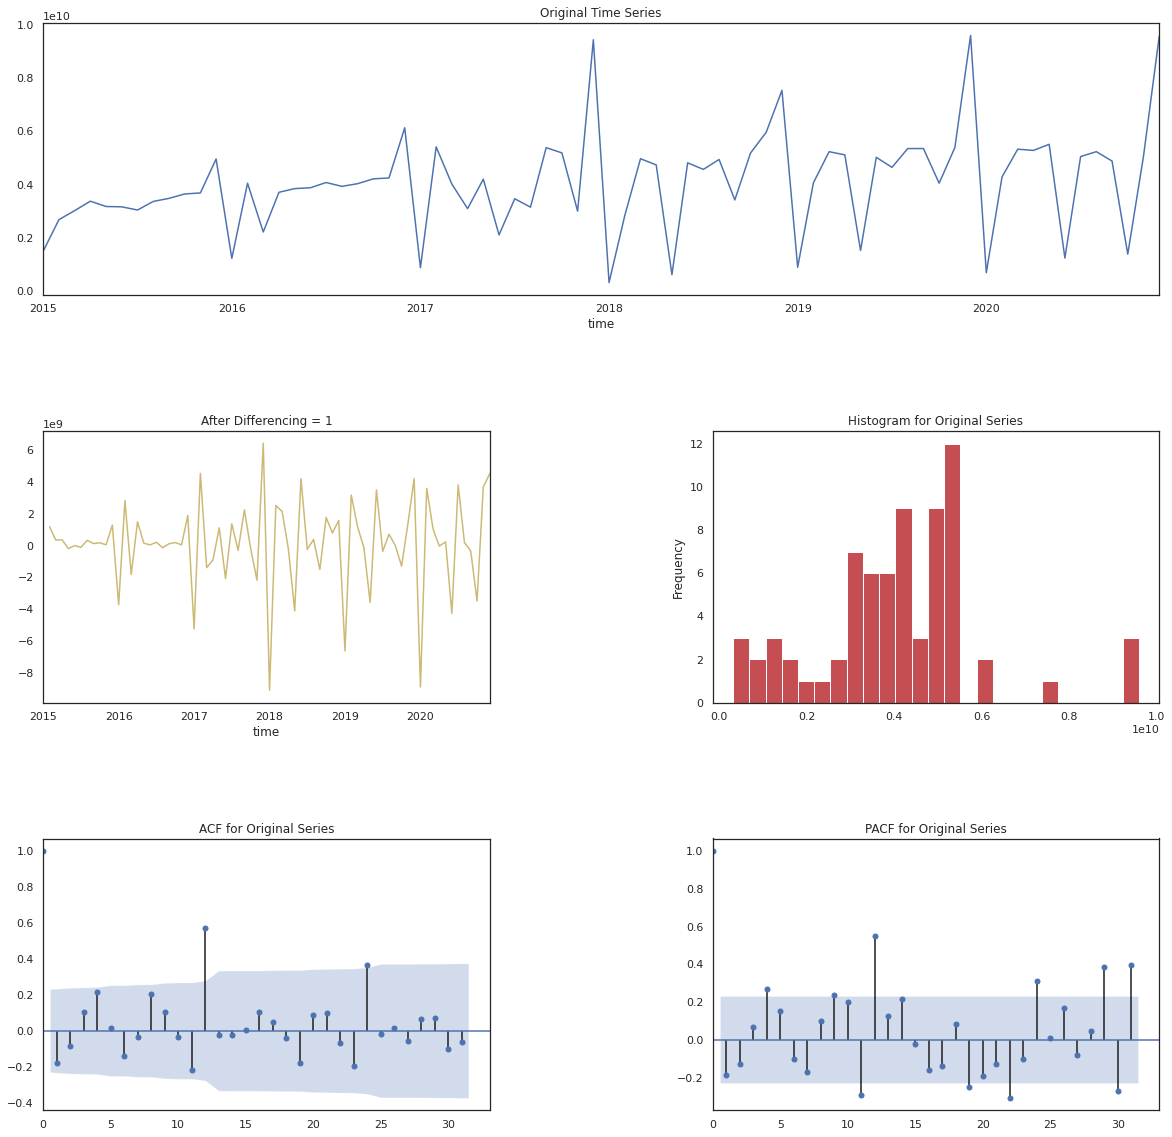

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(72, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 47 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 1,680,641,681.60
    Std Deviation of actuals = 2,158,119,577.76
    Normalized RMSE = 78%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 52 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 740,102,645.52
    Std Deviation of actuals = 1,449,981,207.90
    Normalized RMSE = 51%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 57 Test Shape: 5
    Root Mean Squared Error predicti

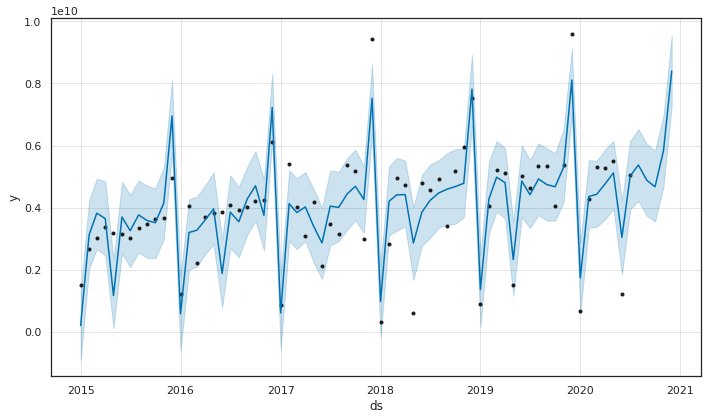

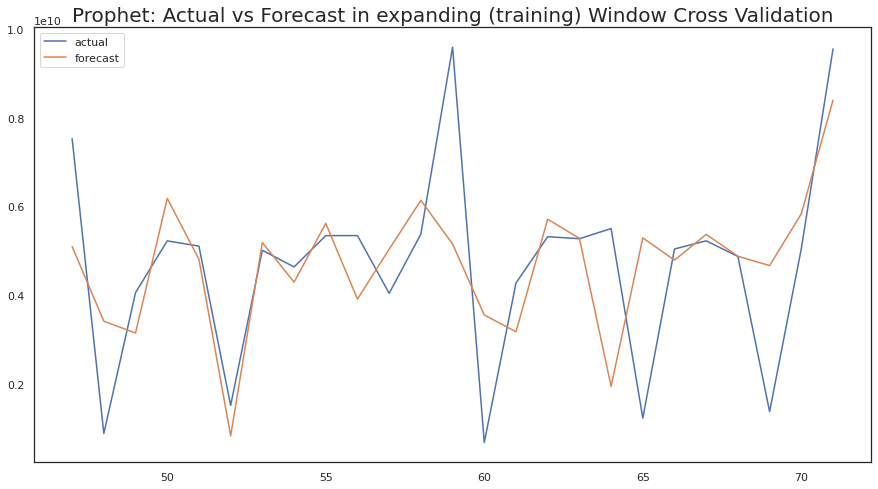

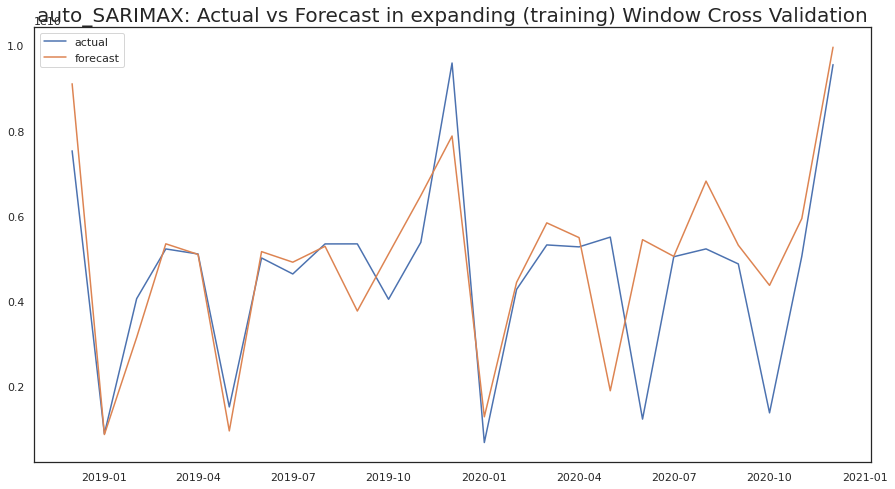

In [ ]:
ml_dict.fit(traindata=billing_data, ts_column=ts_column, target=target, cv=5, sep=",")

In [ ]:
#give empty test dataframe having additional period for forecasting
val = pd.DataFrame({'BilledAmount':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
uni_predict = ml_dict.predict( testdata = val, model = 'best')
uni_predict

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,4.160519e+08,1.386514e+09,-2.301465e+09,3.133569e+09
2021-02-01,4.069582e+09,1.456796e+09,1.214314e+09,6.924849e+09
2021-03-01,5.078891e+09,1.463908e+09,2.209684e+09,7.948098e+09
2021-04-01,5.029329e+09,1.464645e+09,2.158677e+09,7.899982e+09
2021-05-01,5.244987e+09,1.464722e+09,2.374184e+09,8.115789e+09
2021-06-01,9.651559e+08,1.464730e+09,-1.905662e+09,3.835974e+09
2021-07-01,4.763256e+09,1.464731e+09,1.892436e+09,7.634076e+09
2021-08-01,4.935802e+09,1.464731e+09,2.064982e+09,7.806622e+09
2021-09-01,4.572346e+09,1.464731e+09,1.701526e+09,7.443166e+09
2021-10-01,1.067078e+09,1.464731e+09,-1.803742e+09,3.937898e+09


In [ ]:
uni_predict.yhat.to_csv('Univariate_Predictions.csv')

In [ ]:
(uni_predict[['yhat']]).to_csv('Univariate_Predictions.csv')

In [ ]:
!cp Univariate_Predictions.csv /gdrive/My\ Drive/AIML/Univariate_Predictions.csv

In [ ]:
!ls /gdrive/My\ Drive/AIML -l

## Multivariate - only personnel capacity

In [ ]:
billing_pc_data = read_csv('/gdrive/My Drive/AIML/Budget_PC_Billing_Pattern.csv',parse_dates={'time':['Year','Month']},)

In [ ]:
billing_pc_data

,time,PC,BilledAmount
0,2015-01-01,15598,1495573889
1,2015-02-01,15598,2677319369
2,2015-03-01,15771,3017270141
3,2015-04-01,15944,3371122481
4,2015-05-01,16092,3171867579
...,...,...,...
67,2020-08-01,20593,5229801635
68,2020-09-01,20753,4877444978
69,2020-10-01,20681,1383242561
70,2020-11-01,20645,5056037033


In [ ]:
ts_column_pc = 'time'
target_pc = 'BilledAmount'

In [ ]:
ml_dict_pc = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -7.0719477050443444      |
|           p-value           |    4.911350778459484e-10     |
|          #Lags Used         |             1.0              |
| Number of Observations Used |             70.0             |
|     Critical Value (1%)     |     -3.5274258688046647      |
|     Critical Value (5%)     |      -2.903810816326531      |
|     Critical Value (10%)    |     -2.5893204081632653      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = BilledAmount
Start of loading of data.....
Input is data frame. Performing Time Series Analysis

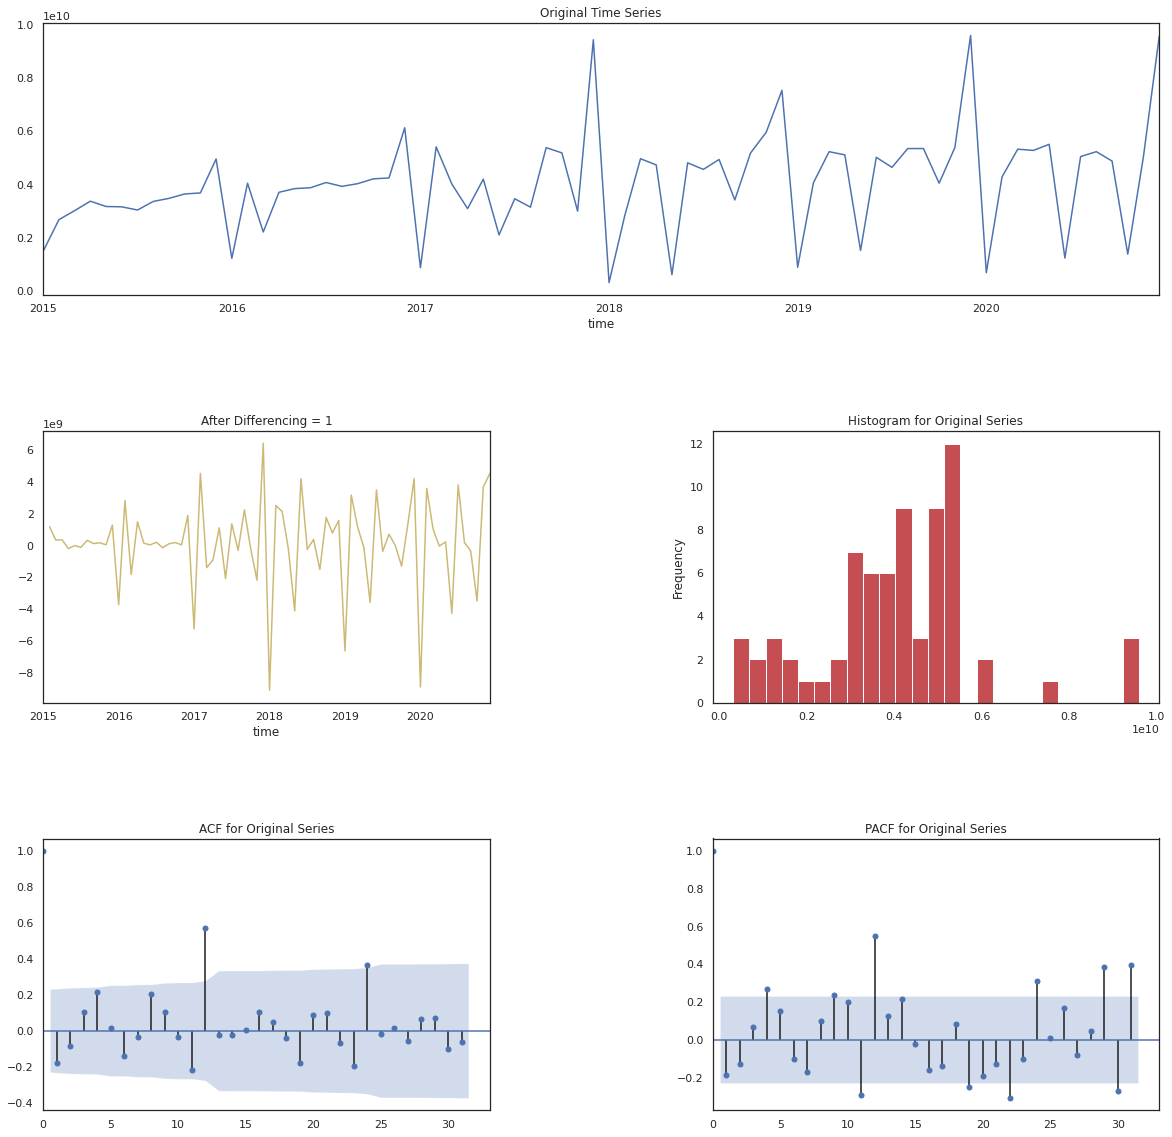

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(72, 3)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 47 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 1,680,641,681.60
    Std Deviation of actuals = 2,158,119,577.76
    Normalized RMSE = 78%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 52 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 740,102,645.52
    Std Deviation of actuals = 1,449,981,207.90
    Normalized RMSE = 51%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 57 Test Shape: 5
    Root Mean Squared Error predicti

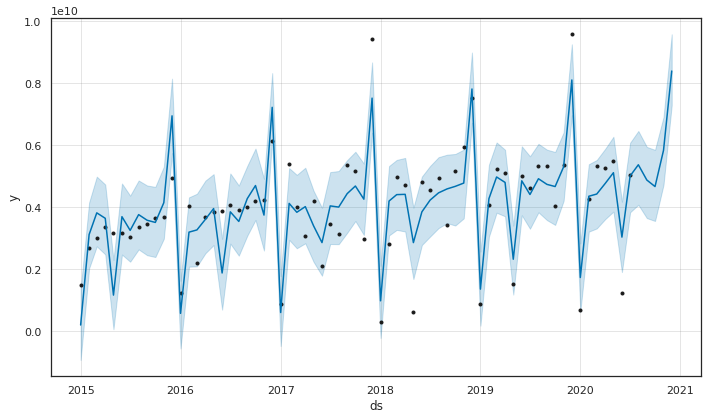

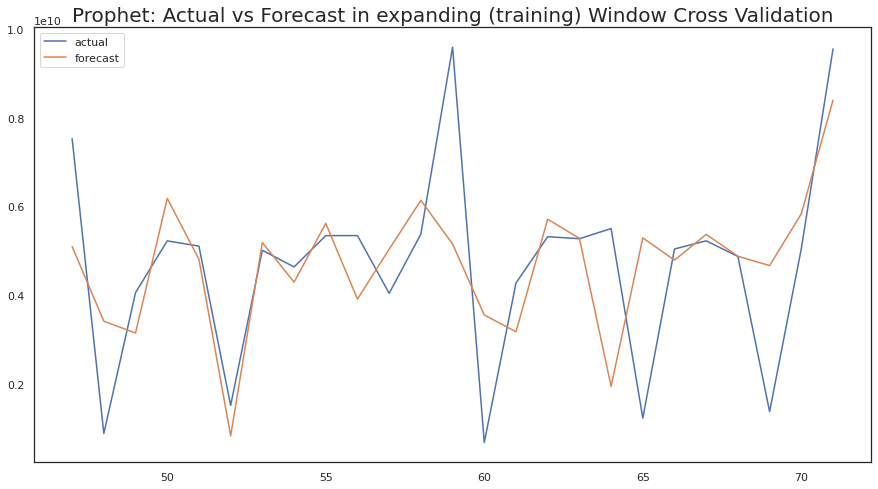

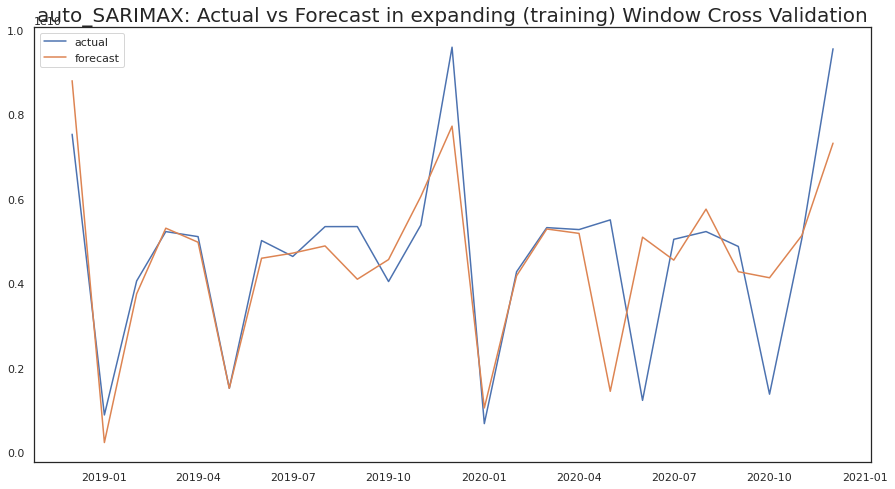

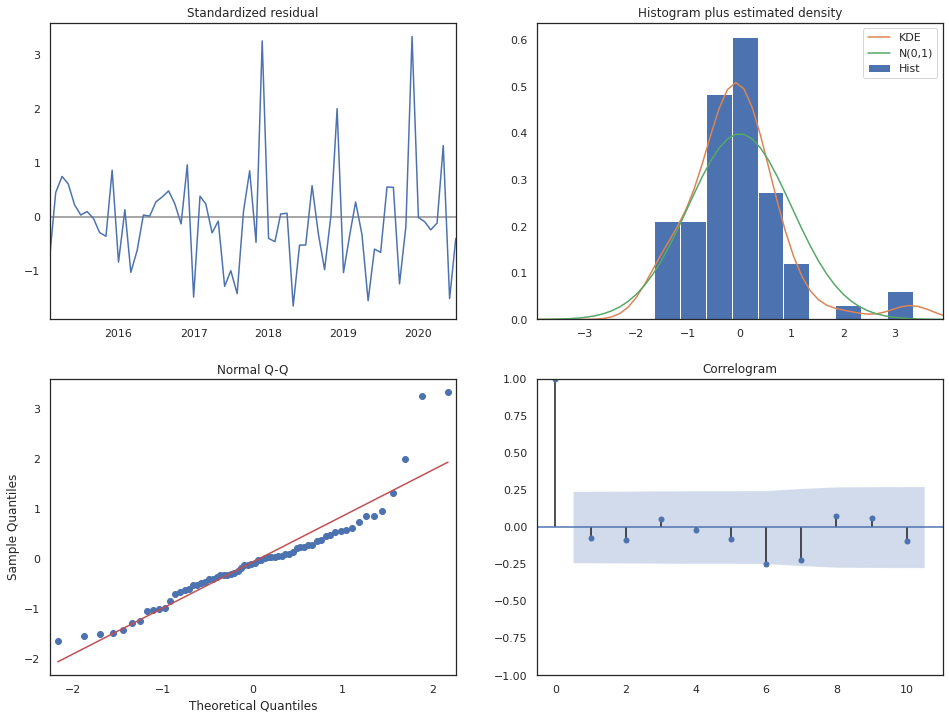

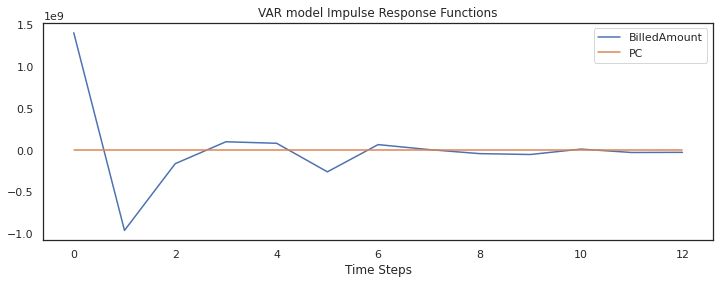

In [ ]:
ml_dict_pc.fit(traindata=billing_pc_data, ts_column=ts_column, target=target_pc, cv=5, sep=",")

In [ ]:
#Create additional dataframe for further predictions
val_df_pc = pd.DataFrame({'time':['2021-01-01','2021-02-01','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01','2021-11-01','2021-12-01'],
                             'PC':[20802,20781,20786,20802,20781,20786,20802,20781,20786,20802,20781,20786],
                             'BilledAmount':[0,0,0,0,0,0,0,0,0,0,0,0]})

In [ ]:
multi_pc = ml_dict_pc.predict(testdata = val_df_pc, model = 'best')

In [ ]:
multi_pc

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,1.650208e+09,1.581408e+09,-1.449296e+09,4.749711e+09
2021-02-01,4.445912e+09,1.747662e+09,1.020559e+09,7.871266e+09
2021-03-01,5.681386e+09,1.761166e+09,2.229565e+09,9.133207e+09
2021-04-01,5.376941e+09,1.799500e+09,1.849986e+09,8.903896e+09
2021-05-01,5.538594e+09,1.802041e+09,2.006659e+09,9.070530e+09
2021-06-01,2.648330e+09,1.804170e+09,-8.877777e+08,6.184437e+09
2021-07-01,5.309811e+09,1.805751e+09,1.770604e+09,8.849018e+09
2021-08-01,5.401199e+09,1.805756e+09,1.861983e+09,8.940415e+09
2021-09-01,5.166088e+09,1.805932e+09,1.626527e+09,8.705648e+09
2021-10-01,2.714728e+09,1.805981e+09,-8.249290e+08,6.254385e+09


In [ ]:
(multi_pc[['yhat']]).to_csv('Multivariate_PC.csv')

In [ ]:
!cp Multivariate_PC.csv /gdrive/My\ Drive/AIML/Multivariate_PC.csv

In [ ]:
!ls /gdrive/My\ Drive/AIML -l

total 2747
dr-x------ 2 root root    4096 Nov  4  2018  AIML_LABS_BLR_2
-rw------- 1 root root 1017505 Apr 10 03:14  AutoTS_Billing_20210408_2000.ipynb
-rw------- 1 root root  351529 Apr  8 07:00  AutoTS_Billing.ipynb
-rw------- 1 root root    1409 Apr  8 05:04  Budget_Billing-Pattern.csv
-rw------- 1 root root    1844 Apr  8 07:14  Budget_PC_Billing_Pattern.csv
-rw------- 1 root root    2153 Apr 10 03:13  Budget_PC_VD_Billing_Pattern.csv
-rw------- 1 root root     151 Apr 10 03:10  Budget_PC_VD_Billing_Pattern.gsheet
drwx------ 2 root root    4096 Jul 15  2019  CrowdCounting-Bosch
drwx------ 2 root root    4096 Feb 21  2019  Hackathon-3
drwx------ 2 root root    4096 Oct 25  2019  IIIT-H
drwx------ 2 root root    4096 Jul 13  2019  Misc
-rw------- 1 root root     356 Apr 12 04:32  Multivariate_PC.csv
-rw------- 1 root root  121601 Nov 13  2019  plot_calibration.ipynb
-rw------- 1 root root     439 Apr  9 03:36  predictions_forecast.csv
-rw------- 1 root root     151 Apr  9 02:20  pred

## Multivariate PC & Volume discount

In [ ]:
billing_pc_vd_data = read_csv('/gdrive/My Drive/AIML/Budget_PC_VD_Billing_Pattern.csv',parse_dates={'time':['Year','Month']},)

In [ ]:
billing_pc_vd_data

,time,PC,Volume Discount,BilledAmount
0,2015-01-01,15597.5,0,1.495574e+09
1,2015-02-01,15597.5,0,2.677319e+09
2,2015-03-01,15770.5,0,3.017270e+09
3,2015-04-01,15943.5,0,3.371122e+09
4,2015-05-01,16091.5,0,3.171868e+09
...,...,...,...,...
67,2020-08-01,20592.5,0,5.229802e+09
68,2020-09-01,20753.0,-147378112,4.877445e+09
69,2020-10-01,20680.5,-3693117879,1.383243e+09
70,2020-11-01,20644.5,0,5.056037e+09


In [ ]:
ts_column_pc_vd = 'time'
target_pc_vd = 'BilledAmount'

In [ ]:
ml_dict_pc_vd = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |      -7.071947705017618      |
|           p-value           |    4.911350779199861e-10     |
|          #Lags Used         |             1.0              |
| Number of Observations Used |             70.0             |
|     Critical Value (1%)     |     -3.5274258688046647      |
|     Critical Value (5%)     |      -2.903810816326531      |
|     Critical Value (10%)    |     -2.5893204081632653      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = BilledAmount
Start of loading of data.....
Input is data frame. Performing Time Series Analysis

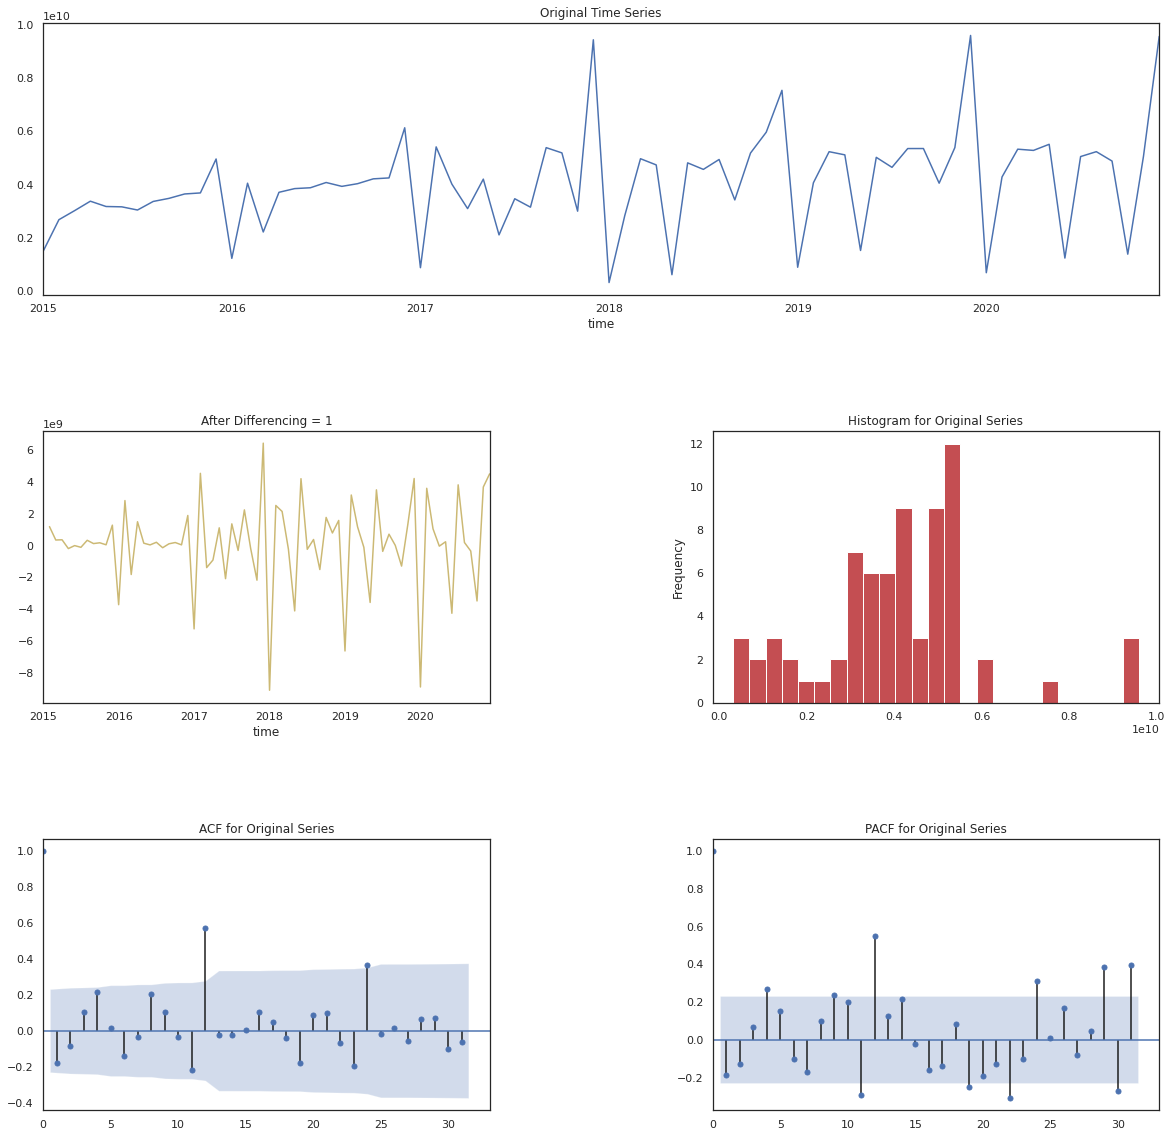

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(72, 4)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 47 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 1,680,641,681.49
    Std Deviation of actuals = 2,158,119,577.76
    Normalized RMSE = 78%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 52 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 740,102,645.46
    Std Deviation of actuals = 1,449,981,207.90
    Normalized RMSE = 51%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 57 Test Shape: 5
    Root Mean Squared Error predicti

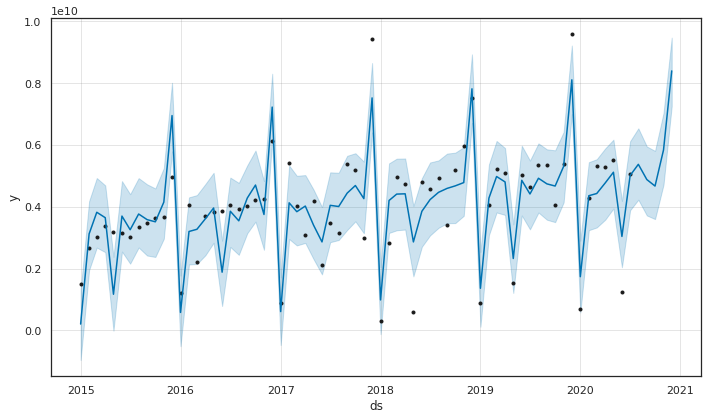

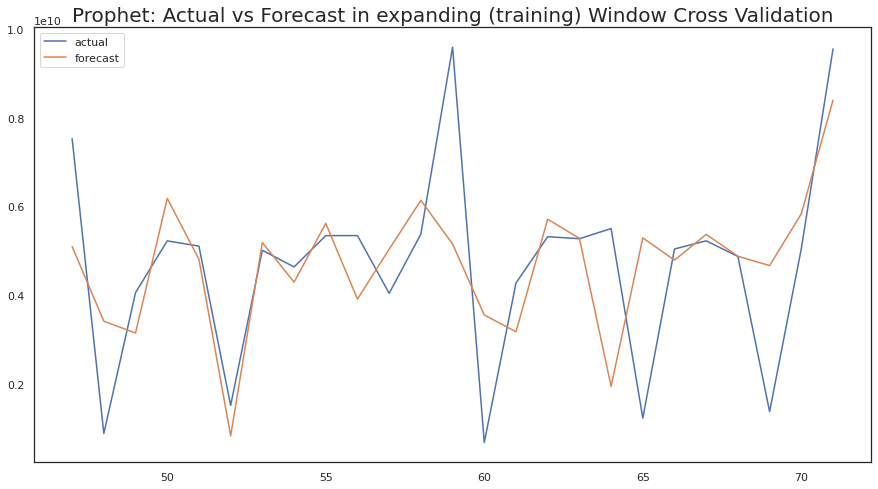

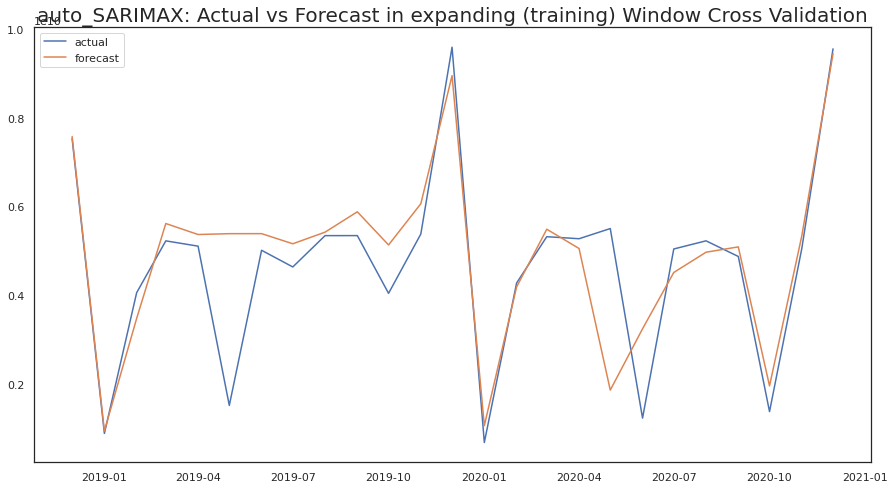

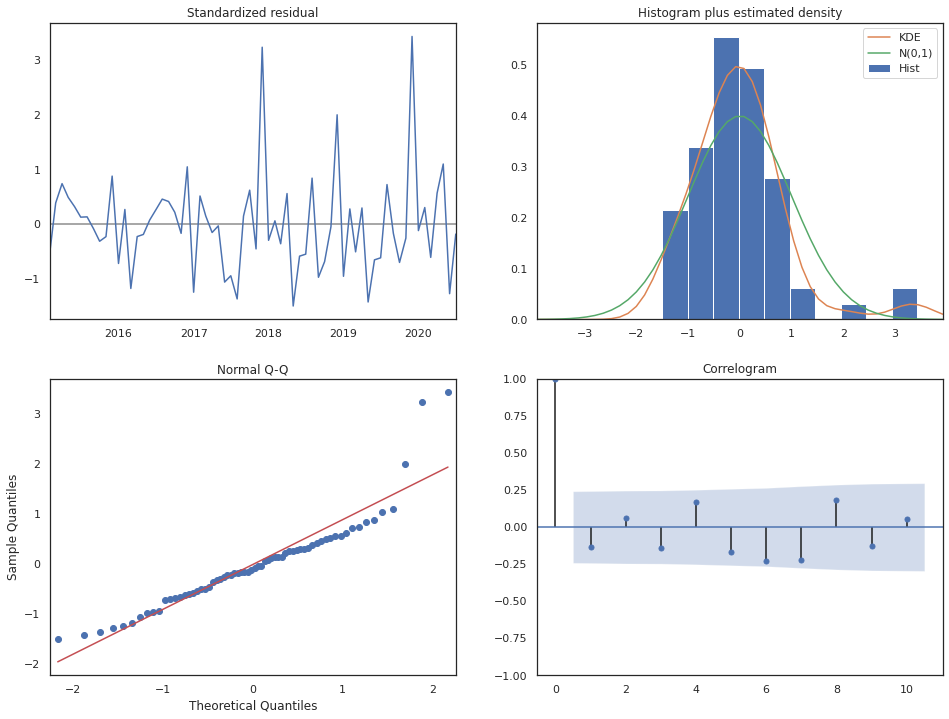

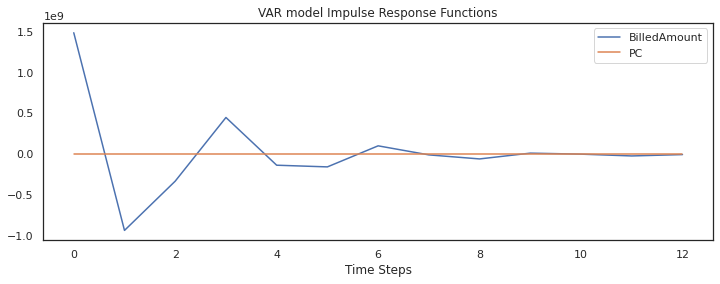

In [ ]:
ml_dict_pc.fit(traindata=billing_pc_vd_data, ts_column=ts_column, target=target_pc, cv=5, sep=",")

In [ ]:
#Create additional dataframe for further predictions
val_df_pc_vd = pd.DataFrame({'time':['2021-01-01','2021-02-01','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01','2021-11-01','2021-12-01'],
                             'PC':[20802,20781,20786,20802,20781,20786,20802,20781,20786,20802,20781,20786],
                              'Volume Discount' : [0,0,-158232458,0,0,0,0,0,0,-200358974,0,0],
                             'BilledAmount':[0,0,0,0,0,0,0,0,0,0,0,0]})

In [ ]:
val_df_pc_vd

,time,PC,Volume Discount,BilledAmount
0,2021-01-01,20802,0,0
1,2021-02-01,20781,0,0
2,2021-03-01,20786,-158232458,0
3,2021-04-01,20802,0,0
4,2021-05-01,20781,0,0
5,2021-06-01,20786,0,0
6,2021-07-01,20802,0,0
7,2021-08-01,20781,0,0
8,2021-09-01,20786,0,0
9,2021-10-01,20802,-200358974,0


In [ ]:
multi_pc_vd = ml_dict_pc.predict(testdata = val_df_pc_vd, model = 'best')

In [ ]:
multi_pc_vd

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,9.277276e+08,1.147945e+09,-1.322204e+09,3.177659e+09
2021-02-01,4.371843e+09,1.173596e+09,2.071638e+09,6.672049e+09
2021-03-01,5.340942e+09,1.174742e+09,3.038491e+09,7.643393e+09
2021-04-01,5.375002e+09,1.174793e+09,3.072449e+09,7.677555e+09
2021-05-01,4.649935e+09,1.174796e+09,2.347378e+09,6.952492e+09
2021-06-01,4.524922e+09,1.174796e+09,2.222364e+09,6.827480e+09
2021-07-01,5.083781e+09,1.174796e+09,2.781223e+09,7.386338e+09
2021-08-01,5.325484e+09,1.174796e+09,3.022927e+09,7.628042e+09
2021-09-01,5.179271e+09,1.174796e+09,2.876714e+09,7.481829e+09
2021-10-01,4.131184e+09,1.174796e+09,1.828626e+09,6.433741e+09


In [ ]:
(multi_pc_vd[['yhat']]).to_csv('Multivariate_PC_VD.csv')

In [ ]:
!cp Multivariate_PC_VD.csv /gdrive/My\ Drive/AIML/Multivariate_PC_VD.csv

In [ ]:
!ls /gdrive/My\ Drive/AIML -l

total 2748
dr-x------ 2 root root    4096 Nov  4  2018  AIML_LABS_BLR_2
-rw------- 1 root root 1017505 Apr 10 03:14  AutoTS_Billing_20210408_2000.ipynb
-rw------- 1 root root  351529 Apr  8 07:00  AutoTS_Billing.ipynb
-rw------- 1 root root    1409 Apr  8 05:04  Budget_Billing-Pattern.csv
-rw------- 1 root root    1844 Apr  8 07:14  Budget_PC_Billing_Pattern.csv
-rw------- 1 root root    2153 Apr 10 03:13  Budget_PC_VD_Billing_Pattern.csv
-rw------- 1 root root     151 Apr 10 03:10  Budget_PC_VD_Billing_Pattern.gsheet
drwx------ 2 root root    4096 Jul 15  2019  CrowdCounting-Bosch
drwx------ 2 root root    4096 Feb 21  2019  Hackathon-3
drwx------ 2 root root    4096 Oct 25  2019  IIIT-H
drwx------ 2 root root    4096 Jul 13  2019  Misc
-rw------- 1 root root     356 Apr 12 04:32  Multivariate_PC.csv
-rw------- 1 root root     352 Apr 12 04:43  Multivariate_PC_VD.csv
-rw------- 1 root root  121601 Nov 13  2019  plot_calibration.ipynb
-rw------- 1 root root     439 Apr  9 03:36  predic

In [ ]:
multi_pc_vd